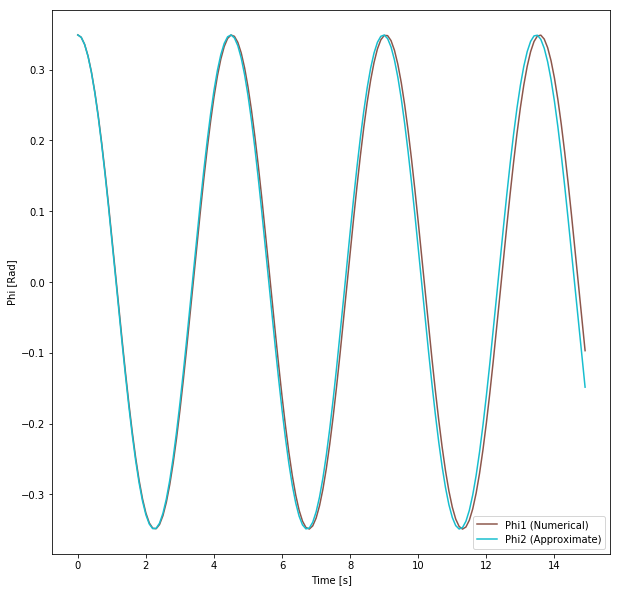

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import odeint

def f(phi, t, params):
    phi, y = phi           # The overall series of diff-eq's will contain phi and y as target variables.
    R, g = params          # Unpacks the parameters within the derivatives. The equations below
                           # will be dphi_dt = y, dy_dt = d^2phi_dt^2, and ensure syntax is separated out clearly for python to read.
    derivs = [y,
             (-g)/(R) * (np.sin(phi))]
    return derivs

# Parameters          
R = 5              # radius of half-pipe [m]
g = 9.8            # force of gravity [m*s^-2]

# Initial values
phi0 = 20 * np.pi/180
t = 0                  # Angle from top center of half-pipe to location of skateboard is pi/9 radians, initial value t = 0

# Bundle parameters for ODE solver
params = [R, g]

#Bundle initial conditions, ensure that y0 is within a range [x, y, z...] otherwise ODEINT won't process it.
y0 = [phi0, t]

#To ensure 3 periods are shown, t(0,15,0.1) is an acceptable domain.
tStop = 15
tInc = 0.1
t = np.arange(0, tStop, tInc)

# Call the ODE solver and assign f2 = phi2, psoln = phi1
psoln = odeint(f, y0, t, args=(params,))
f2 = (phi0) * (np.cos(np.sqrt((g)/(R))*t))

# Plot phi as a function of time
fig = plt.figure(1, figsize=(10,10))
plt.plot(t, psoln[:,0], 'C5', label="Phi1 (Numerical)")
plt.plot(t, f2, 'C9', label="Phi2 (Approximate)")
plt.xlabel('Time [s]')
plt.ylabel('Phi [Rad]')
plt.legend()

plt.show()